# 7.1 字符串编码格式简介

### 字符串类型及操作
- 字符串是用双引号""或者单引号''括起来的一个或多个字符。
- 字符串可以保存在变量中，也可以单独存在。
- 可以用type()函数或isinstance()测试一个字符串的类型。
- 除了支持序列通用方法（包括双向索引、比较大小、计算长度、元素访问、切片、成员测试等操作）以外，字符串类型还支持一些特有的操作方法，例如字符串格式化、查找、替换、排版等等。
- 字符串是不可变序列字符串属于不可变序列，不能直接对字符串对象进行元素增加、修改与删除等操作，切片操作也只能访问其中的元素而无法使用切片来修改字符串中的字符,替换等操作不是原地操作，而是返回一个新字符串作为结果。

### 字符串编码
- 最早的字符串编码是美国标准信息交换码ASCII，仅对10个数字、26个大写英文字母、26个小写英文字母及一些其他符号进行了编码。ASCII码采用1个字节来对字符进行编码，最多只能表示256个符号。
- GB2312是我国制定的中文编码，使用1个字节表示英语，2个字节表示中文；GBK是GB2312的扩充，而CP936是微软在GBK基础上开发的编码方式。GB2312、GBK和CP936都是使用2个字节表示中文。
- UTF-8对全世界所有国家需要用到的字符进行了编码，以1个字节表示英语字符(兼容ASCII)，以3个字节表示中文，还有些语言的符号使用2个字节（例如俄语和希腊语符号）或4个字节。
- 不同编码格式之间相差很大，采用不同的编码格式意味着不同的表示和存储形式，把同一字符存入文件时，写入的内容可能会不同，在试图理解其内容时必须了解编码规则并进行正确的解码。如果解码方法不正确就无法还原信息。
- Python 3.x完全支持中文字符，默认使用UTF-8编码格式，无论是一个数字、英文字母，还是一个汉字，在统计字符串长度时都按一个字符对待和处理。

In [2]:
import sys
print(sys.getdefaultencoding())
x='哈哈'.encode('utf-8')
y='哈哈'.encode('gbk')
print(x,y)
c1=x.decode('utf-8')
c2=y.decode('gbk')
c2=x.decode('gbk')#必须使用同样的或者兼容的编码格式进行解码才能还原本来的信息。
print(c1,c2)

utf-8
b'\xe5\x93\x88\xe5\x93\x88' b'\xb9\xfe\xb9\xfe'
哈哈 鍝堝搱


- ASCII:
        A-Z : 65-90
        a-z : 97-122
        0-9 : 48-57

In [16]:
x = 'a'.encode('utf-8')
print(x,type(x),x.decode())
y = ord('a')  #ord()返回单个字符的unicode码(ASCII)
print(y)
print(type(y))
print(chr(y),chr(y+1)) #chr（）返回unicode编码对应的字符

b'a' <class 'bytes'> a
97
<class 'int'>
a b


In [17]:
print(chr(ord("5")+4))
print(ord(chr(97)))

9
97


- 微实例:将小写字母转化为大写字母,其余字符不变

In [ ]:
plaincode = input('请输入明文:')
for i in plaincode:
    if i.islower() == True:
        print(chr(ord(i)-32),end = ' ')
    else:
        print(i,end = ' ')

# 7.2 转义字符与原始字符串

- 常用转义字符
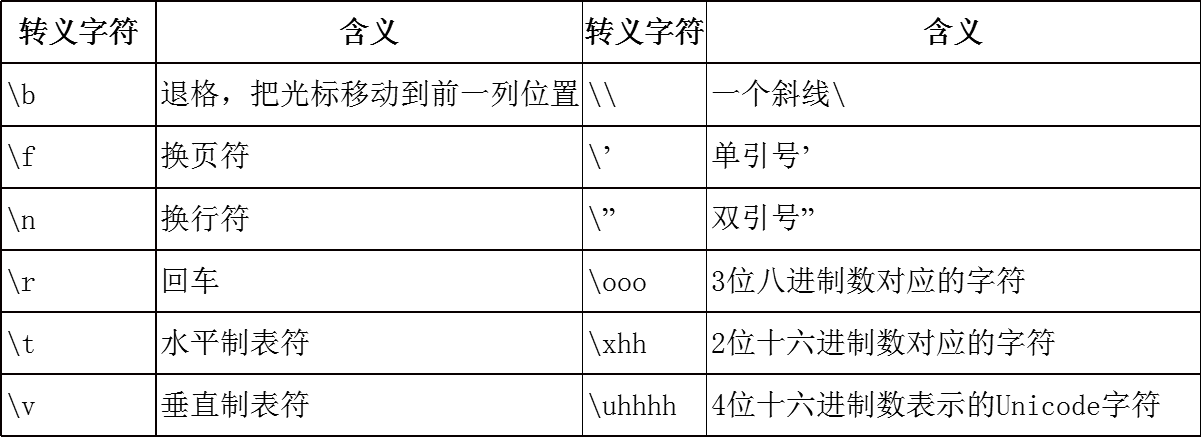

In [7]:
print('\101')  #3位八进制数对应的字符（转为十进制后参照ASCII）
print('x41')  #2位十六进制数对应的字符

A
x41


In [8]:
path = 'C:\Windows\notepad.exe'
print(path)                       #字符\n被转义为换行符

path = r'C:\Windows\notepad.exe'  #原始字符串，任何字符都不转义
print(path)

C:\Windows
otepad.exe
C:\Windows\notepad.exe


# 7.3 字符串格式化

## 7.3.2 format()方法进行字符串格式化

### 主要格式：
- b（二进制格式）
- c（把整数转换成Unicode字符）
- d（十进制格式）
- o（八进制格式）
- x（小写十六进制格式）
- X（大写十六进制格式）
- e/E（科学记数法格式）
- f/F（固定长度的浮点数格式）
- %（使用固定长度浮点数显示百分数）

In [26]:
print('{0:.3f}'.format(1/3))  #没有小数点则保留6位
print('{0:%}'.format(3.5))  #格式化为百分数
print("The number {0:,} in hex is: {0:#x}, in oct is {0:o}".format(55))  #‘#’的作用为添加进制前缀

0.333
350.000000%
The number 55 in hex is: 0x37, in oct is 67


In [28]:
print('My name is {name}, my gender is {gender}, my age is {age}.'.format(age = 18, name = 'XZP', gender = 'male'))

My name is XZP, my gender is male, my age is 18.


In [30]:
position = (5, 8, 13)
print("X:{0[0]};Y:{0[1]};Z:{0[2]}".format(position))  #使用元组的同时格式化多个值

X:5;Y:8;Z:13


### 示例

- 显示一个数n的二进制，八进制，十进制，十六进制

In [34]:
n = int(input('a number:'))
print('二进制：{0:b}, 八进制：{0:o}, 十进制：{0:d}, 十六进制：{0:x}'.format(n))

a number:16
二进制：10000, 八进制：20, 十进制：16, 十六进制：10


- 从键盘输入一个正整数n，然后输入n个数字，对这n个数字求和并显示结果。

In [38]:
n = int(input("输入一个正整数："))
t = 0
for i in range(1,n+1):
    x = int(input("请输入第{}个数：".format(i)))
    t = t + x
print("数字的总和是：{}".format(t))

输入一个正整数：2
请输入第1个数：3
请输入第2个数：4
数字的总和是：7
